# Data modelling 

## Part III

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
housing_raw = pd.read_csv('data/housing_processed.csv')

In [4]:
housing_data = housing_raw[['median_house_value','log_median_house_value','sqrt_median_house_value','sqr_median_house_value','in_city','median_income', # main variables
                            'log_person/room','log_person/household', 'log_room/person', 'log_household/person',
                            'sqrt_person/room','sqrt_person/household', 'sqrt_room/person', 'sqrt_household/person',
                             'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND','ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']] # ocean variables

## Checking OLS assumptions

1. No multicollinearity
2. Linearity
3. Normality and homoscedascity - check error plot

In [5]:
housing_data.corr()

,median_house_value,log_median_house_value,sqrt_median_house_value,sqr_median_house_value,in_city,median_income,log_person/room,log_person/household,log_room/person,log_household/person,sqrt_person/room,sqrt_person/household,sqrt_room/person,sqrt_household/person,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
median_house_value,1.000000,0.948833,0.988052,0.967221,0.437561,0.661582,-0.329794,-0.329794,0.329794,0.329794,-0.273260,-0.273260,0.298473,0.298473,0.259990,-0.487941,0.163489,0.141330
log_median_house_value,0.948833,1.000000,0.985811,0.843919,0.526243,0.661227,-0.293671,-0.293671,0.293671,0.293671,-0.246814,-0.246814,0.262192,0.262192,0.334656,-0.568445,0.162782,0.143738
sqrt_median_house_value,0.988052,0.985811,1.000000,0.918128,0.486562,0.670566,-0.316777,-0.316777,0.316777,0.316777,-0.264310,-0.264310,0.284708,0.284708,0.300694,-0.534545,0.165296,0.144359
sqr_median_house_value,0.967221,0.843919,0.918128,1.000000,0.341352,0.611559,-0.329916,-0.329916,0.329916,0.329916,-0.269827,-0.269827,0.302790,0.302790,0.182791,-0.389296,0.151939,0.128963
in_city,0.437561,0.526243,0.486562,0.341352,1.000000,0.276770,0.149876,0.149876,-0.149876,-0.149876,0.109084,0.109084,-0.160693,-0.160693,0.433192,-0.675880,0.228022,0.086790
median_income,0.661582,0.661227,0.670566,0.611559,0.276770,1.000000,-0.409055,-0.409055,0.409055,0.409055,-0.345864,-0.345864,0.359618,0.359618,0.178664,-0.239850,0.056113,0.017607
log_person/room,-0.329794,-0.293671,-0.316777,-0.329916,0.149876,-0.409055,1.000000,1.000000,-1.000000,-1.000000,0.901330,0.901330,-0.949494,-0.949494,0.189462,-0.124827,-0.081570,-0.030161
log_person/household,-0.329794,-0.293671,-0.316777,-0.329916,0.149876,-0.409055,1.000000,1.000000,-1.000000,-1.000000,0.901330,0.901330,-0.949494,-0.949494,0.189462,-0.124827,-0.081570,-0.030161
log_room/person,0.329794,0.293671,0.316777,0.329916,-0.149876,0.409055,-1.000000,-1.000000,1.000000,1.000000,-0.901330,-0.901330,0.949494,0.949494,-0.189462,0.124827,0.081570,0.030161
log_household/person,0.329794,0.293671,0.316777,0.329916,-0.149876,0.409055,-1.000000,-1.000000,1.000000,1.000000,-0.901330,-0.901330,0.949494,0.949494,-0.189462,0.124827,0.081570,0.030161


In [6]:
# checking multilinearity
housing_data[['log_person/room','log_person/household', 'log_room/person', 'log_household/person',
                            'sqrt_person/room','sqrt_person/household', 'sqrt_room/person', 'sqrt_household/person']].corr().style.background_gradient()

,log_person/room,log_person/household,log_room/person,log_household/person,sqrt_person/room,sqrt_person/household,sqrt_room/person,sqrt_household/person
log_person/room,1.000000,1.000000,-1.000000,-1.000000,0.901330,0.901330,-0.949494,-0.949494
log_person/household,1.000000,1.000000,-1.000000,-1.000000,0.901330,0.901330,-0.949494,-0.949494
log_room/person,-1.000000,-1.000000,1.000000,1.000000,-0.901330,-0.901330,0.949494,0.949494
log_household/person,-1.000000,-1.000000,1.000000,1.000000,-0.901330,-0.901330,0.949494,0.949494
sqrt_person/room,0.901330,0.901330,-0.901330,-0.901330,1.000000,1.000000,-0.769916,-0.769916
sqrt_person/household,0.901330,0.901330,-0.901330,-0.901330,1.000000,1.000000,-0.769916,-0.769916
sqrt_room/person,-0.949494,-0.949494,0.949494,0.949494,-0.769916,-0.769916,1.000000,1.000000
sqrt_household/person,-0.949494,-0.949494,0.949494,0.949494,-0.769916,-0.769916,1.000000,1.000000


log person/room

or
sqrt person/room
sqrt room/person


In [7]:
variables = housing_data[['log_median_house_value','log_person/room','in_city', 'median_income']]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,9.932047,log_median_house_value
1,4.600910,log_person/room
2,4.218852,in_city
3,9.317045,median_income


In [8]:
variables = housing_data[['median_house_value','log_person/room','in_city', 'median_income']]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,9.224259,median_house_value
1,4.168158,log_person/room
2,4.007787,in_city
3,10.304591,median_income


In [9]:
variables = housing_data[['sqr_median_house_value','sqrt_person/room','sqrt_room/person','in_city', 'median_income']]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.126505,sqr_median_house_value
1,0.442692,sqrt_person/room
2,12.093995,sqrt_room/person
3,1.237030,in_city
4,1.724399,median_income


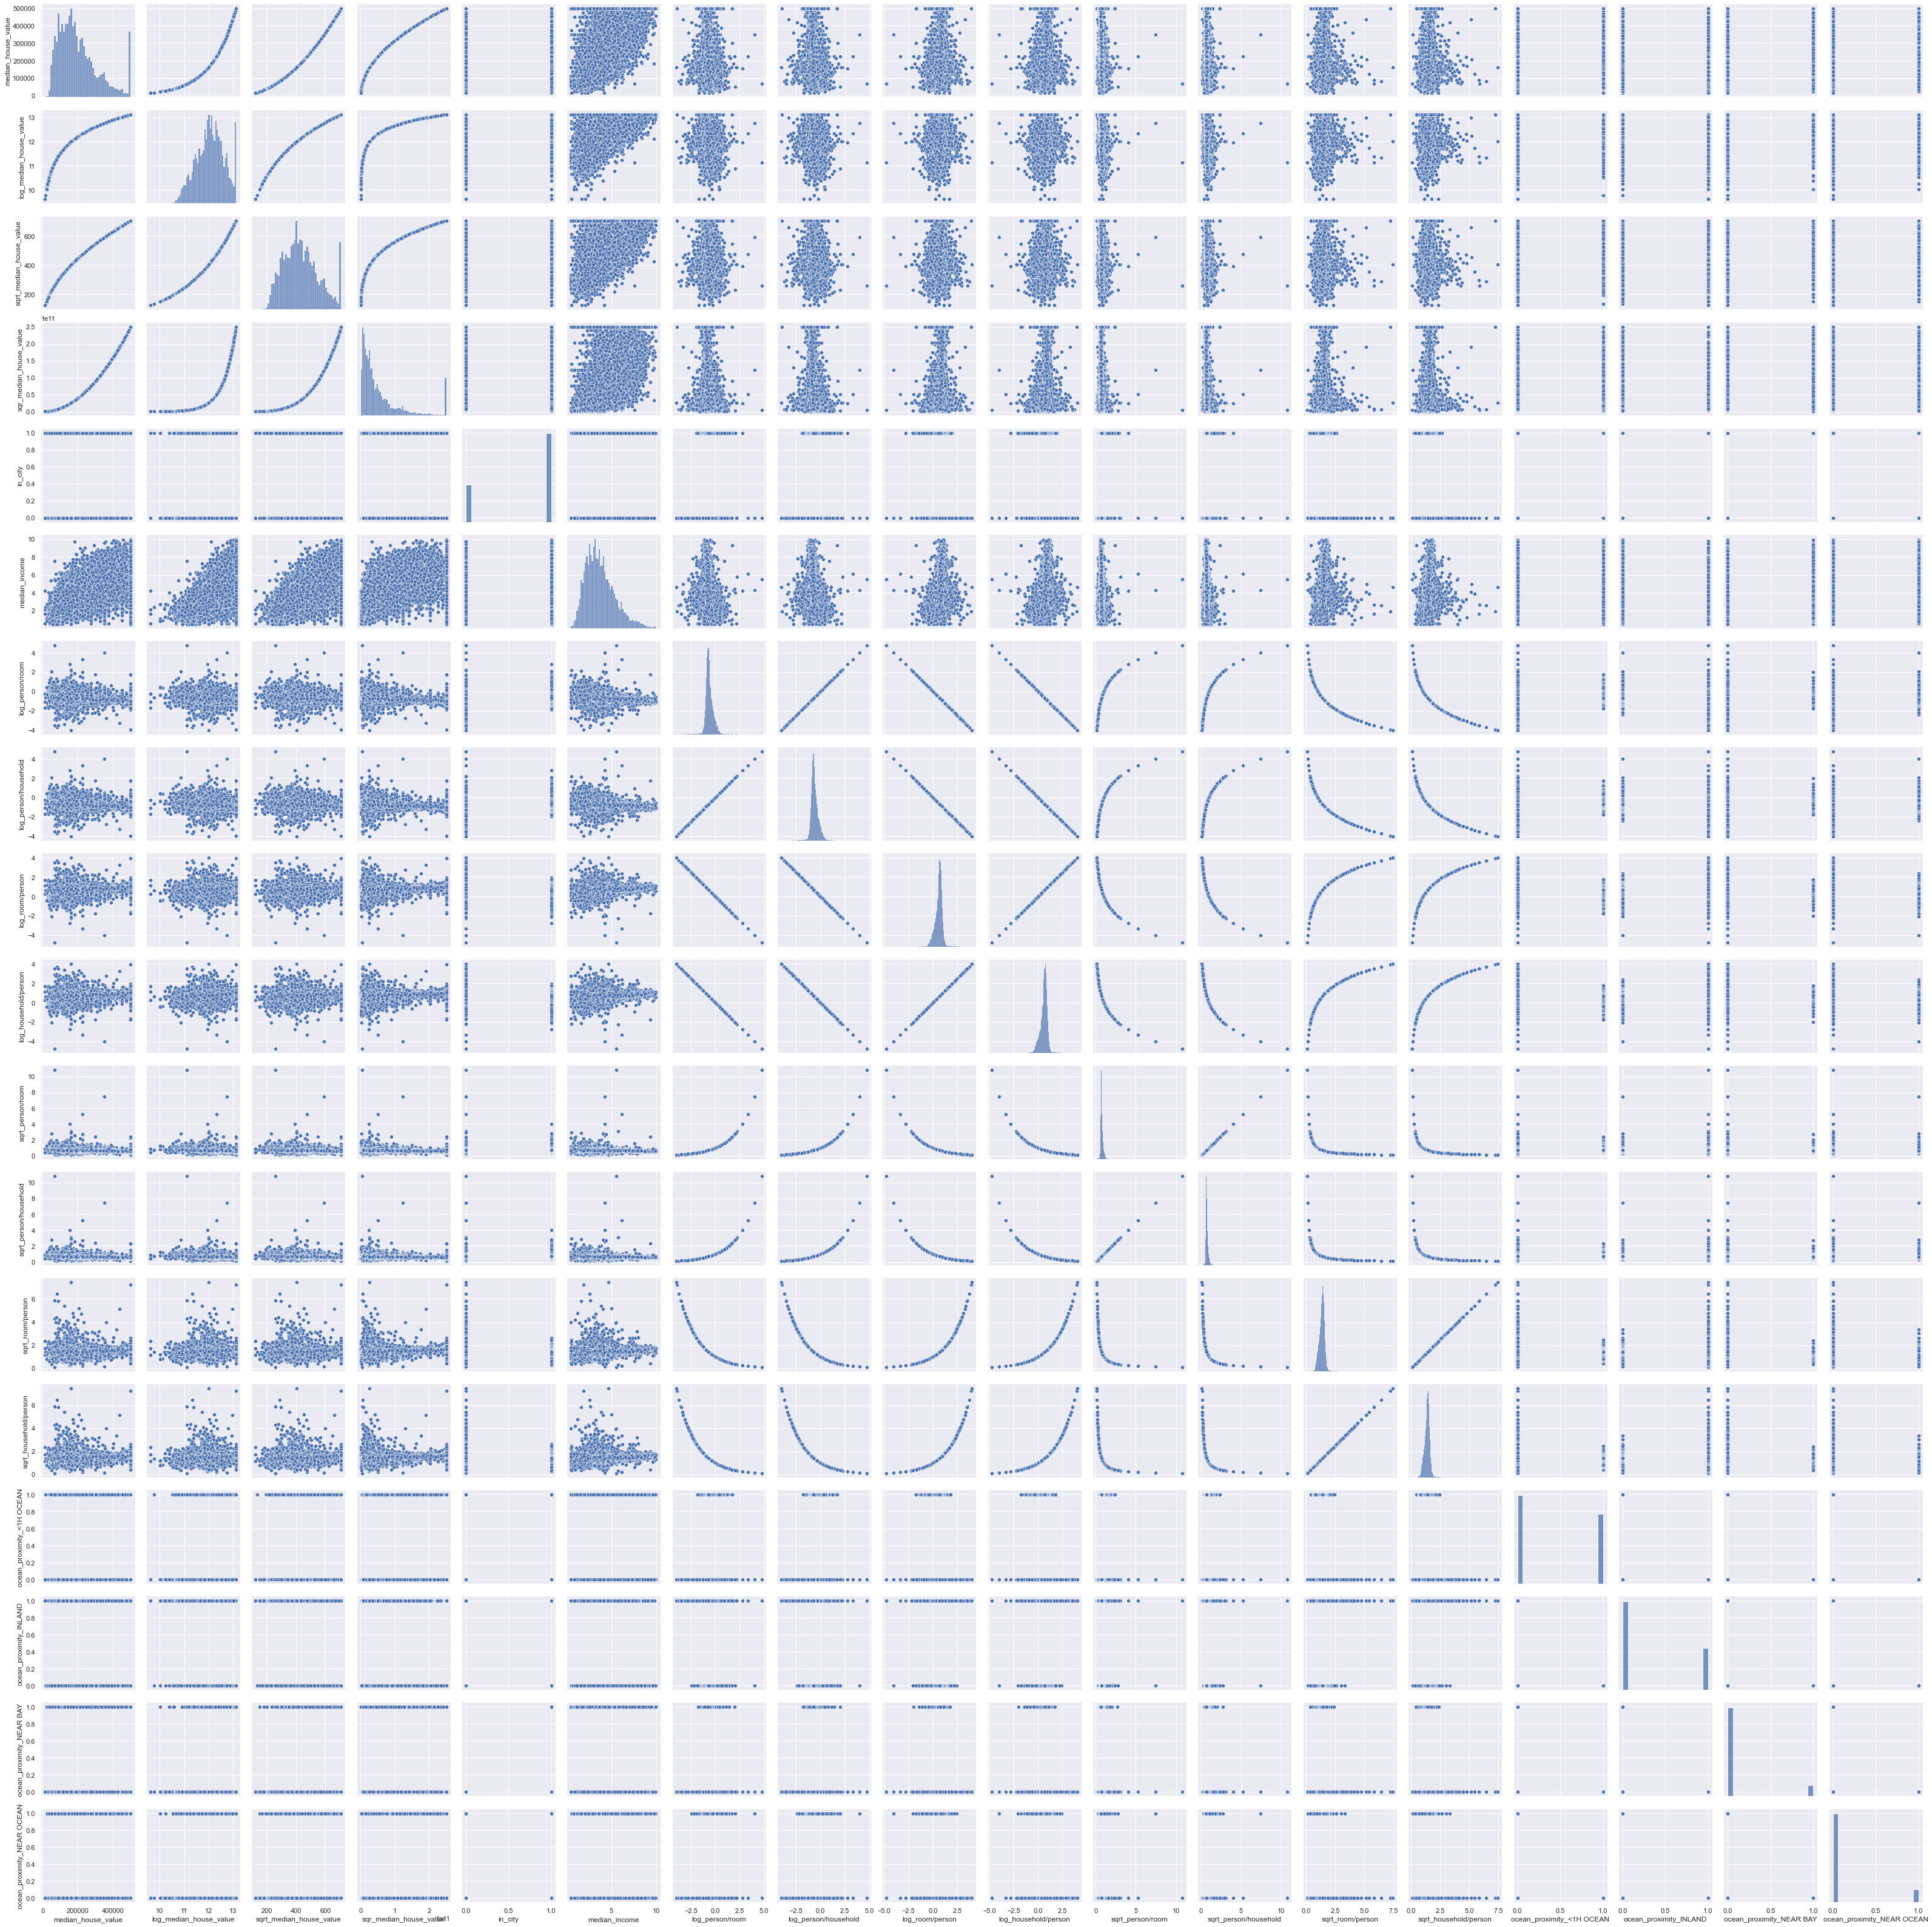

In [10]:
# Checking linearity
sns.pairplot(housing_data)
plt.show()

## Choosing the best model to use

In [11]:
for model in [['log_median_house_value','log_person/room','in_city', 'median_income','ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND','ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
              ['median_house_value','log_person/room','in_city', 'median_income','ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND','ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
              ['sqr_median_house_value','sqrt_person/room','sqrt_room/person','in_city', 'median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND','ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]:
    
    y = housing_data[[model[0]]]
    x_before = housing_data[model[1:]]
    x = sm.add_constant(x_before)
    
    model1 = sm.OLS(y,x).fit()
    print(model1.summary())
    print('\n')

                              OLS Regression Results                              
Dep. Variable:     log_median_house_value   R-squared:                       0.653
Model:                                OLS   Adj. R-squared:                  0.653
Method:                     Least Squares   F-statistic:                     5463.
Date:                    Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                            18:35:58   Log-Likelihood:                -6290.3
No. Observations:                   20332   AIC:                         1.260e+04
Df Residuals:                       20324   BIC:                         1.266e+04
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [12]:
x = housing_data[['log_person/room','in_city', 'median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND','ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]
y = housing_data[['log_median_house_value']]

## Metrics
MSE is highly biased for higher values. RMSE is better in terms of reflecting performance when dealing with large error values. MAE is less biased for higher values

I will use RMSE as it is the 'gentlest' metric that is the best in dealing with large error values which is appripriate for a high variance dataset like this. I will use MAE too

In [13]:
def rmse(y_actual, y_hat):
    return np.sqrt(mean_squared_error(y_actual, y_hat))

In [14]:
rmse(np.array([1,2,3,4]), np.array([3,4,5,6]))

2.0

## Linear regression model
I will use the statsmodels ols module to calculate the summary tatistics of the model as sklearn does not have an easy to use function

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_validate, x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size=0.5)
print(len(x_train), len(y_train))
print(len(x_validate), len(y_validate))
print(len(x_test), len(y_test))

14232 14232
3050 3050
3050 3050


In [16]:
reg = LinearRegression(normalize=True)
reg.fit(x_train,y_train)
# I chose to use normalize=True to normalize the data instead of using the 
# standardscaler as recommended on https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

LinearRegression(normalize=True)

In [17]:
reg.score(x_train,y_train)

0.6582905496944433

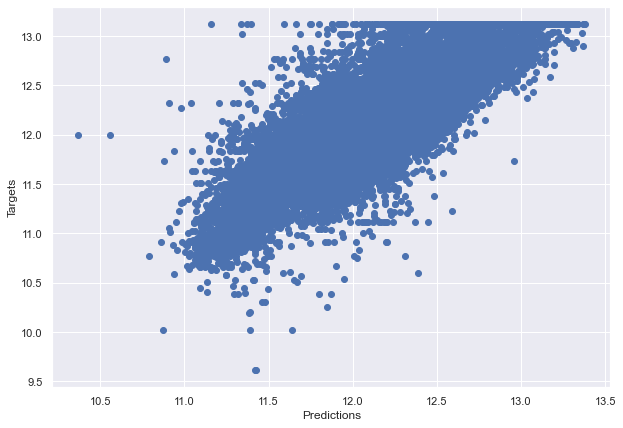

RMSE: 0.3284863830723215
MAE: 0.2537507929332424


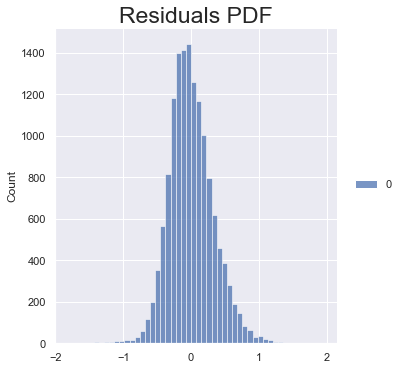

In [18]:
y_hat = reg.predict(x_train)

plt.figure(figsize=(10,7))
plt.scatter(y_hat, y_train)
plt.xlabel('Predictions')
plt.ylabel('Targets')
plt.show()
print('RMSE:', rmse(y_train, y_hat))
print('MAE:', mean_absolute_error(y_train, y_hat))
sns.displot(y_train.values - y_hat, bins=50)
plt.title("Residuals PDF", size=23)
plt.show()

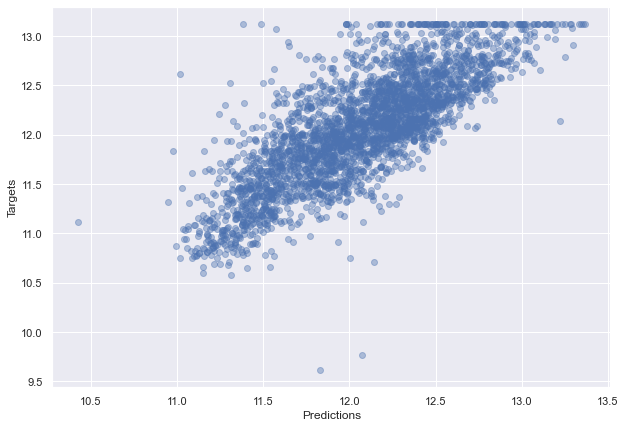

RMSE: 0.34023549755544186
MAE: 0.2611133777126996


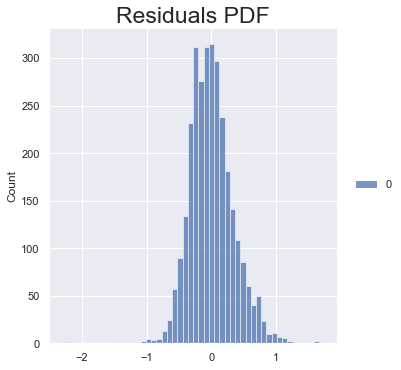

In [24]:
y_hat = reg.predict(x_test)

plt.figure(figsize=(10,7))
plt.scatter(y_hat, y_test, alpha=.4)
plt.xlabel('Predictions')
plt.ylabel('Targets')
plt.show()
print('RMSE:', rmse(y_test, y_hat))
print('MAE:', mean_absolute_error(y_test, y_hat))

sns.displot(y_test.values - y_hat, bins=50)
plt.title("Residuals PDF", size=23)
plt.show()

In [21]:
scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler3 = StandardScaler()